<a href="https://colab.research.google.com/github/precisep/Affiliate-Website/blob/main/user_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cognician: User Actity  on technological devices from different sites                                                                         
### 29/05/2023
#### Thabang Mokoena

### Introduction:
This report presents an analysis of user activity on technological devices across three different programs. The dataset includes user age, device interactions, and session durations for a one-month period. The objective is to gain insights into user behavior and identify any notable patterns or trends across the sites.

## Importing modules
Important python modules for data evaluation.

In [150]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as sp
import imgkit
!pip install imgkit
!apt-get install -y wkhtmltopdf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
wkhtmltopdf is already the newest version (0.12.5-1build1).
0 upgraded, 0 newly installed, 0 to remove and 33 not upgraded.


# Loading Dataset
Now that we are able to utilize python from the available modules we can start exploring the given data set, sourced from an excel file.

In [151]:
data = pd.read_excel('user_ctivity.xlsx',sheet_name = 'Sheet1', skiprows =1)
data.head()

,User,Age,Site,Average Session Time (Minutes),Interactions this Month,Device,New/Returning,Source
0,Gouldy,38,JumpUp,32.885549,9,Mobile,N,Organic
1,Carr,41,StartFresh,12.770629,8,Desktop,N,Referral
2,Bishop,53,HealthWise,32.613916,1,Desktop,R,Referral
3,Clements,63,HealthWise,37.047459,4,Desktop,N,Referral
4,Cortez,34,JumpUp,19.852115,10,Desktop,N,Referral


In [152]:
html_table = data.head().to_html()

imgkit.from_string(html_table, '/table_sample.png')

QStandardPaths: XDG_RUNTIME_DIR not set, defaulting to '/tmp/runtime-root'
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


True

# Data Details


The **.info()** method in pandas helps identify data types, but understanding the features is crucial for effective analysis and machine learning.

In [153]:
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   User                            100 non-null    object 
 1   Age                             100 non-null    int64  
 2   Site                            100 non-null    object 
 3   Average Session Time (Minutes)  100 non-null    float64
 4   Interactions this Month         100 non-null    int64  
 5   Device                          100 non-null    object 
 6   New/Returning                   100 non-null    object 
 7   Source                          100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB
None


,Age,Average Session Time (Minutes),Interactions this Month
count,100.000000,100.000000,100.000000
mean,37.670000,26.445266,6.160000
std,13.907381,9.835264,2.773322
min,17.000000,6.851782,1.000000
25%,26.000000,18.527822,4.000000
50%,37.000000,25.574066,6.500000
75%,45.000000,34.731861,8.250000
max,89.000000,43.755353,10.000000


In [154]:
data.isnull().sum()

User                              0
Age                               0
Site                              0
Average Session Time (Minutes)    0
Interactions this Month           0
Device                            0
New/Returning                     0
Source                            0
dtype: int64

The output of **data.info()** indicates that the dataset has 7 features. Among these features, 2 are of type int64, 1 is of type float64, and 5 are of type object (presumably representing textual or categorical data).

The output of **data.isnull().sum()** indicates that there are no missing values in the dataset.

Based on the provided summary statistics, we can draw the following conclusions:

**Age**:

The data consists of 100 observations (count).
The average age is approximately 37.67 years (mean).
The age values range from 17 to 89 years (min and max).
The age distribution has a standard deviation of approximately 13.91 years (std).
The data is symmetrically distributed as the mean and median (50th percentile) are close.

<br>**Average Session Time (Minutes)**:


The average session time is approximately 26.45 minutes (mean).
The session times range from 6.85 to 43.76 minutes (min and max).
The session time distribution has a standard deviation of approximately 9.84 minutes (std).
The data is moderately right-skewed as the median (50th percentile) is less than the mean.

<br>**Interactions this Month**:

The average number of interactions this month is approximately 6.16 (mean).
The number of interactions ranges from 1 to 10 (min and max).
The distribution has a standard deviation of approximately 2.77 (std).
The data appears to be roughly symmetric as the mean and median (50th percentile) are similar.


**NB:**Understanding the features is crucial for effective analysis and machine learning tasks, as different data types and their specific characteristics can influence the choice of preprocessing techniques and machine learning algorithms.These summary statistics provide insights into the central tendency, variability, and distribution of the variables.






#  Exploratory Data Analysis
To condact exploratory data analysis we will start by changing the column names and put them is standard python format.




In [155]:
column_names = [name.replace(' ','_').lower() for name in data.columns]
column_names[3] = 'average_session_time_minutes'
column_names[6]='new_or_returning'
data.columns = column_names
data['new_or_returning'].replace({'N': 'New', 'R': 'Returning'},inplace=True)
data.head()


,user,age,site,average_session_time_minutes,interactions_this_month,device,new_or_returning,source
0,Gouldy,38,JumpUp,32.885549,9,Mobile,New,Organic
1,Carr,41,StartFresh,12.770629,8,Desktop,New,Referral
2,Bishop,53,HealthWise,32.613916,1,Desktop,Returning,Referral
3,Clements,63,HealthWise,37.047459,4,Desktop,New,Referral
4,Cortez,34,JumpUp,19.852115,10,Desktop,New,Referral


Since we are collecting data about different users we can start exploring their age.

### Age Distribution 

In [156]:
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)
palette_color = sns.color_palette("Set2")

histogram = go.Histogram(x=data.age, histnorm='probability density',nbinsx=35, name='Age',marker=dict(color='lightseagreen'))
fig.add_trace(histogram, row=1, col=1)
fig.update_traces(marker_line_width=1,marker_line_color="white")
boxplot = go.Box(x=data.age, boxpoints='all', jitter=0.3, pointpos=0, name='Age')
fig.add_trace(boxplot, row=2, col=1)
fig.update_layout(
    height=700,
    width=1500,
    title={
        'text': '<b>User age distribution</b>',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font={
        'size': 23,
        'family': 'Arial',
        'color': 'black'
    }
)
fig.update_xaxes(title_text='<b>Age</b>', row=2, col=1)
fig.update_yaxes(title_text='<b>Probability Density</b>', row=1, col=1)
fig.update_layout(showlegend=False)
fig.show()



In [157]:
outlier_age = data[data['age']>=78].sort_values(by = 'age', ascending=False)
outlier_age

,user,age,site,average_session_time_minutes,interactions_this_month,device,new_or_returning,source
27,Boyd,89,JumpUp,17.798986,1,Desktop,New,Referral
16,Burch,78,StartFresh,19.756960,3,Desktop,New,Referral


The age distribution of the user data is right-skewed, indicating that the **75%** of users are below the age of 45. However, there are two outliers with ages 78 and 89 (Burch and Boyd, respectively), which are significantly higher than the rest of the age values. These outliers might need further investigation as they could potentially impact the analysis or require special consideration in the data processing or modeling stages.

### Popular Site
Eploring the most prefered site by the users.

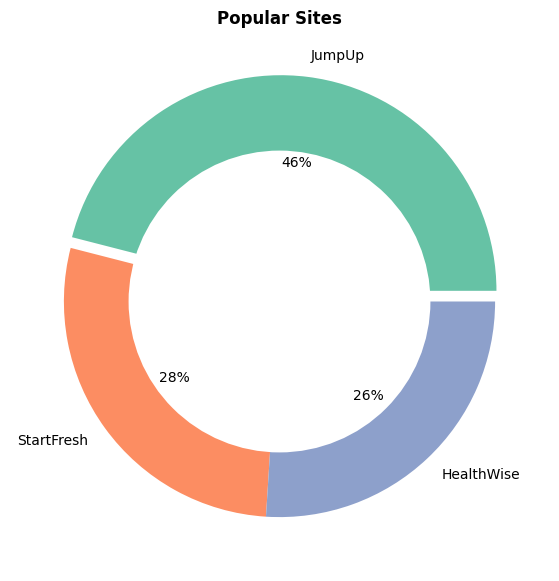

In [158]:
plt.figure(figsize=(15,7))
site_counts = data['site'].value_counts()
unique_sites = site_counts.index
unique_sites = data.site.unique()
explode = [0.05 if site == unique_sites[0] else 0 for site in unique_sites]
palette_color = sns.color_palette("Set2")
plt.pie(data['site'].value_counts().sort_values(ascending=False), 
        labels=data['site'].unique(),
        colors=palette_color,
        explode=explode,
        autopct="%.0f%%"
)
center_circle = plt.Circle((0,0),0.70, fc = 'white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Popular Sites", fontweight="bold")
plt.show()


Based on the provided data, the analysis shows that **"JumpUp"** is the most popular site among the 100 users, with approximately 46% of the users spending their time there. On the other hand, **"HealthWise"** is the least popular site, with approximately 26% of the users spending their time there.

### Popular Device

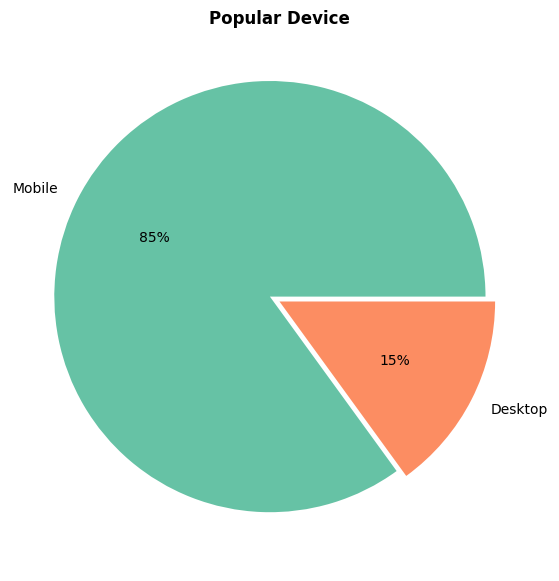

In [159]:
plt.figure(figsize=(15,7))
device_counts = data['device'].value_counts()
unique_device = site_counts.index
unique_device = data.device.unique()
explode = [0.05 if device == unique_device[0] else 0 for device in unique_device ]
palette_color = sns.color_palette("Set2")
plt.pie(data['device'].value_counts().sort_values(ascending=False), 
        labels=data['device'].unique(),
        colors=palette_color,
        explode=explode,
        autopct="%.0f%%"
)
plt.title("Popular Device", fontweight="bold")
plt.show()

Based on the provided data, the analysis shows that mobile devices are the most popular among the users, with approximately 85% of the users using mobile devices. The remaining 15% of users use desktop devices.

### Popular user source

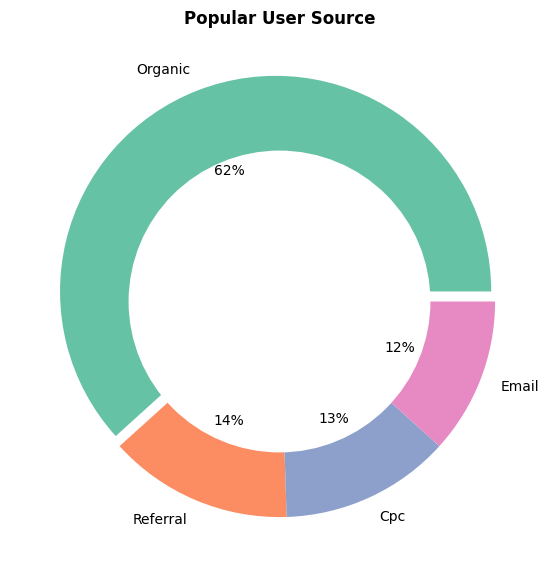

In [160]:
plt.figure(figsize=(15, 7))
data["source"] = data["source"].str.title().str.strip()
data = data[data["source"] != "None"]
source_counts = data['source'].value_counts()
unique_source = source_counts.index
unique_source = data.source.unique()
explode = [0.05 if source == unique_source[0] else 0 for source in unique_source]
palette_color = sns.color_palette("Set2")
plt.pie(source_counts, labels=unique_source, colors=palette_color, explode=explode, autopct="%.0f%%")
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("Popular User Source", fontweight="bold")
plt.show()


The analysis reveals that the majority of users in the dataset were acquired organically, indicating that a significant portion of users discovered the site through natural means rather than through specific referral or advertising channels.

### Session Time Distribution
The session time distribution provides insights into the duration of user interactions on the website or application. By analyzing this distribution, we can understand how users are engaging with the platform and identify any patterns or trends in their session durations. This information can be valuable for optimizing user experience, identifying potential bottlenecks, and improving overall user engagement.

In [161]:
fig = sp.make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.05)
palette_color = sns.color_palette("Set2")

histogram = go.Histogram(x=data.average_session_time_minutes, 
                         histnorm='probability density',nbinsx=35, 
                         name='Avg Session (min)',marker=dict(color='pink'))
fig.add_trace(histogram, row=1, col=1)
fig.update_traces(marker_line_width=1,marker_line_color="white")
boxplot = go.Box(x=data.average_session_time_minutes, boxpoints='all',
                 jitter=0.3, pointpos=0, name='Avg Session (min)', 
                 marker=dict(color='lightseagreen'))
fig.add_trace(boxplot, row=2, col=1)
fig.update_layout(
    height=700,
    width=1500,
    title={
        'text': '<b>User session time distribution</b>',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    title_font={
        'size': 23,
        'family': 'Arial',
        'color': 'black'
    }
)
fig.update_xaxes(title_text='<b>Avg Session (min)</b>', row=2, col=1)
fig.update_yaxes(title_text='<b>Probability Density</b>', row=1, col=1)
fig.update_layout(showlegend=False)
fig.show()

In [162]:
max_session = data.average_session_time_minutes.max().round(2)
print(f'Maximum session spent on a device is {max_session} (min)')

Maximum session spent on a device is 42.68 (min)


The session time distribution analysis reveals that the majority of users (75%) spend less than 35 minutes on their devices during a session. The maximum session duration recorded is 42.68 minutes. This information provides valuable insights into user engagement and can be used to optimize the platform accordingly.

### Site and average session relationship for devices.

The relationship between site and average session duration for different devices is an important aspect to understand user behavior and preferences. By examining the average session duration for each site across various devices, we can gain a deeper understanding of user engagement patterns and identify any variations or trends.

In [163]:
site_avg_session=data.groupby("site")["average_session_time_minutes"].mean().sort_values(ascending=False).round(2)
site_avg_session = site_avg_session.to_frame()
site_avg_session

,average_session_time_minutes
site,
HealthWise,31.02
StartFresh,25.05
JumpUp,23.09


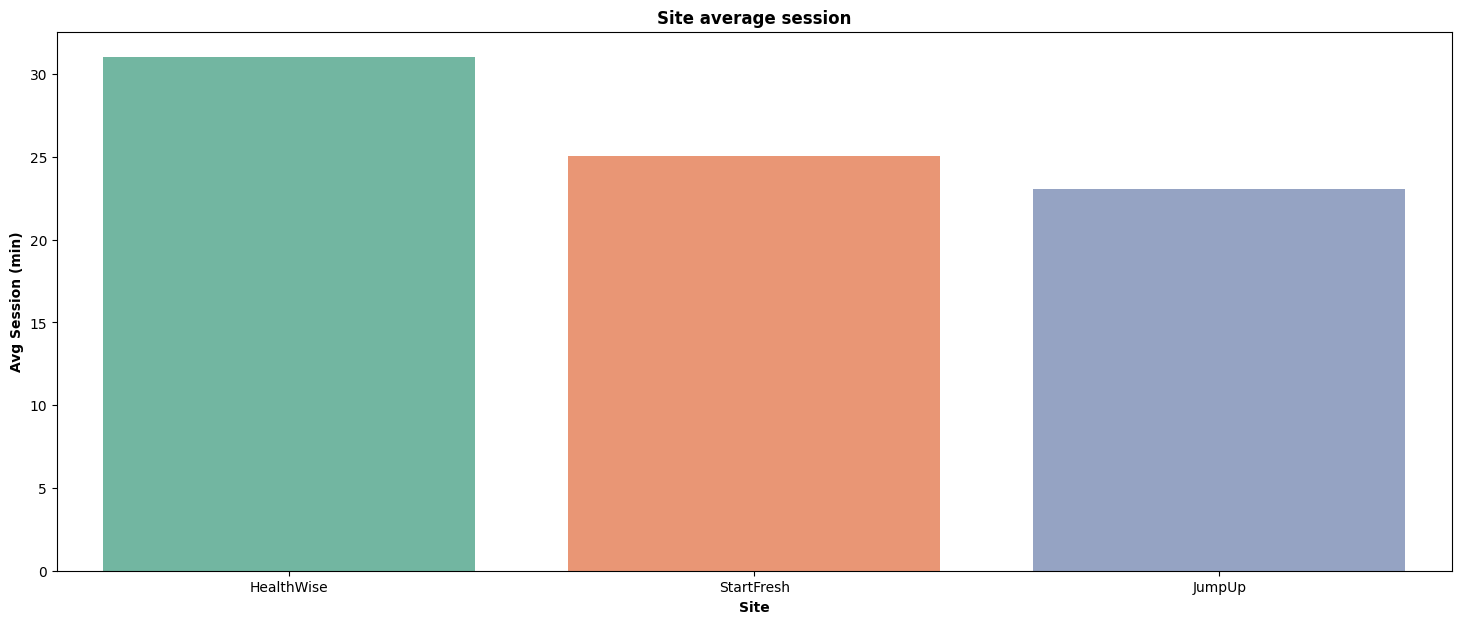

In [164]:
plt.figure(figsize=(18, 7))
palette_color = sns.color_palette("Set2")
sns.barplot(y=site_avg_session["average_session_time_minutes"], x=site_avg_session.index, palette=palette_color)
plt.title("Site average session", fontweight="bold")
plt.xlabel("Site", fontweight="bold")
plt.ylabel("Avg Session (min)", fontweight = "bold")
plt.show()


The average session duration varies across sites, with **HealthWise** having the highest at *31.02 minutes*, followed by **StartFresh** at *25.05 minutes*, and **JumpUp** at *23.09 minutes*.

### Evaluating the most impactfull client source

In order to optimize marketing strategies and drive better results, it is crucial to evaluate the most impactful client source. By analyzing the data, we can determine which client source has the greatest impact on user engagement. This analysis will provide insights into the effectiveness of different client sources and help businesses make informed decisions to enhance their marketing efforts.

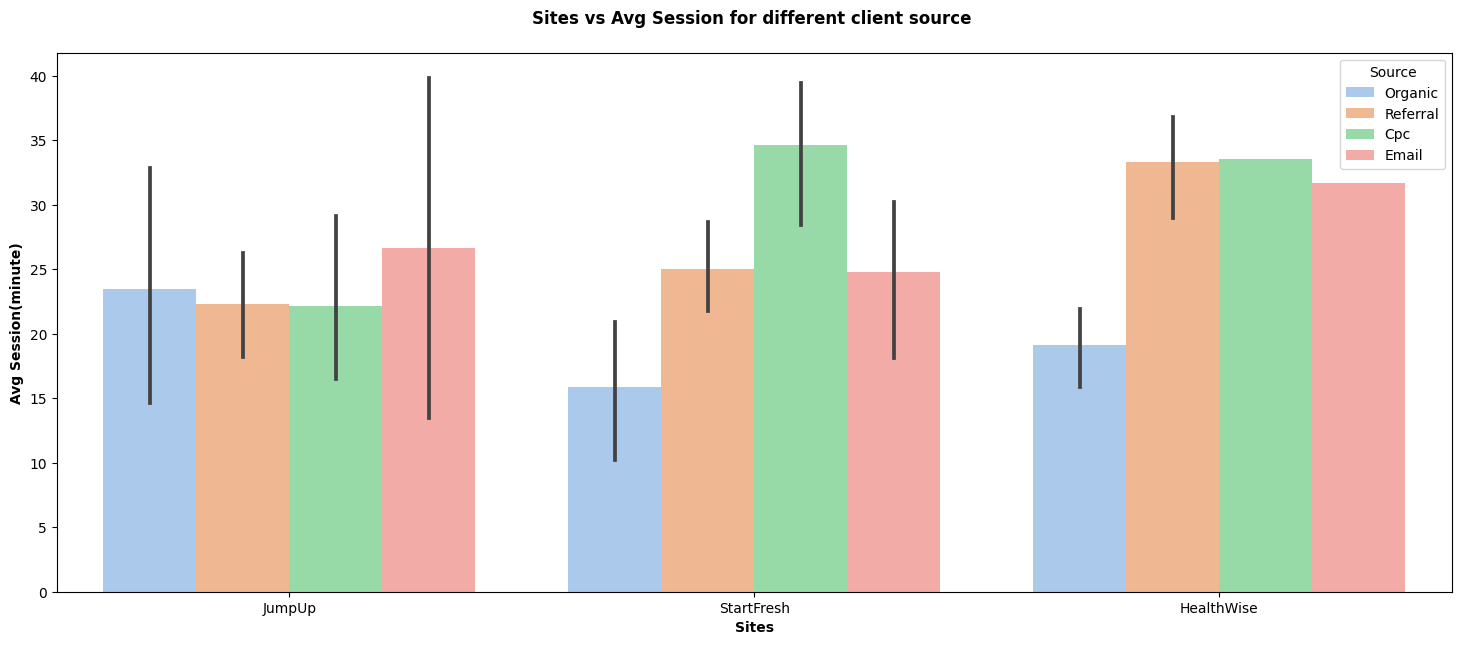

In [165]:
fig, ax = plt.subplots(figsize=(18, 7))
palette_color = sns.color_palette("pastel")
sns.barplot(data=data, x=data["site"], y=data["average_session_time_minutes"], hue = 'source',palette=palette_color)
plt.title("Sites vs Avg Session for different client source \n", fontweight="bold")
plt.ylabel("Avg Session(minute)", fontweight="bold")
plt.xlabel("Sites", fontweight="bold")
plt.legend(title="Source")
plt.show()

The bar chart reveals that JumpUp clients are mostly sourced from emails, while StartFresh clients come from Cpc sources, and HealthWise clients are sourced from referrals and Cpc.

# User Type

Comparing the average session duration between new and returning clients across all sites can help us assess the engagement levels and evaluate user behavior.



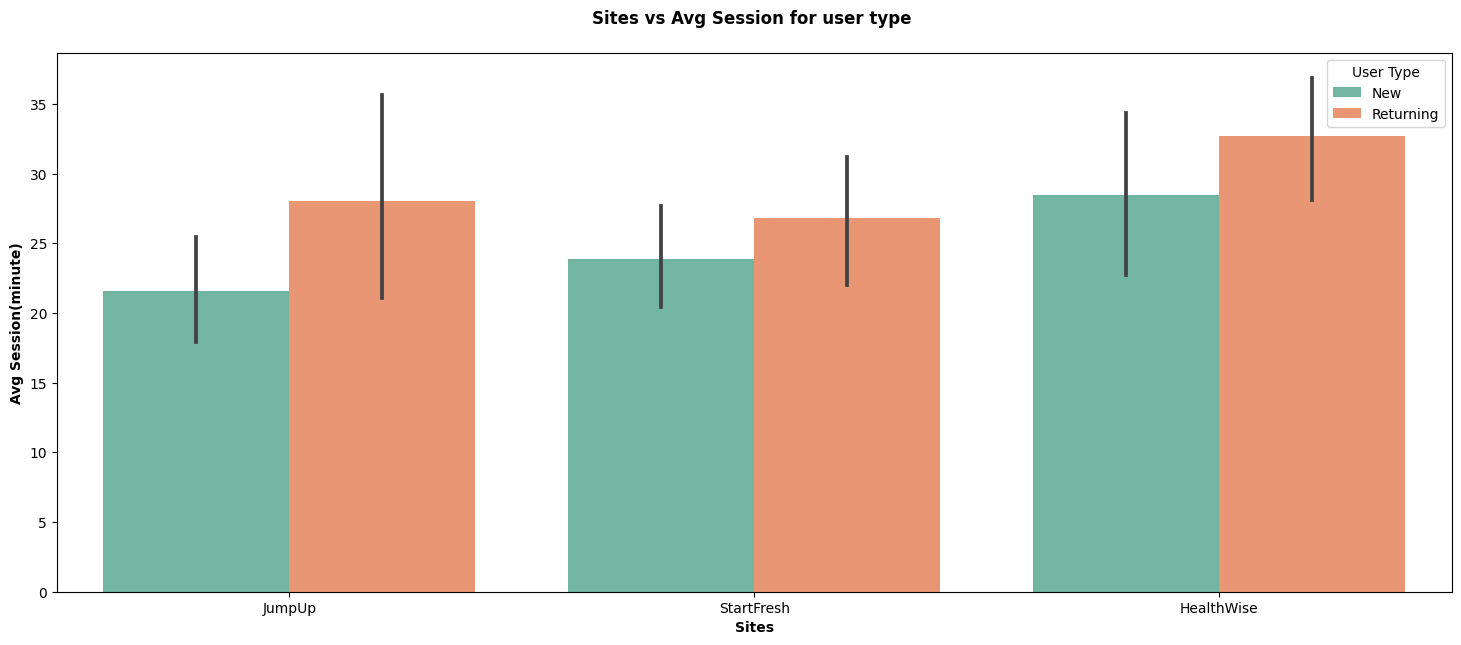

In [166]:
fig, ax = plt.subplots(figsize=(18, 7))
palette_color = sns.color_palette("Set2")
sns.barplot(data=data, x=data["site"], y=data["average_session_time_minutes"], hue = 'new_or_returning',palette=palette_color)
plt.title("Sites vs Avg Session for user type \n", fontweight="bold")
plt.ylabel("Avg Session(minute)", fontweight="bold")
plt.xlabel("Sites", fontweight="bold")
plt.legend(title='User Type')
plt.show()

The bar chart depicts the average session time for different user types on respective sites. Across all sites, returning users tend to have longer average session times compared to new users.

# User Session on the various sites
Analyzing the average user session duration across the three sites can provide valuable insights into user preferences and behaviors, allowing for optimization of user experiences and engagement strategies.

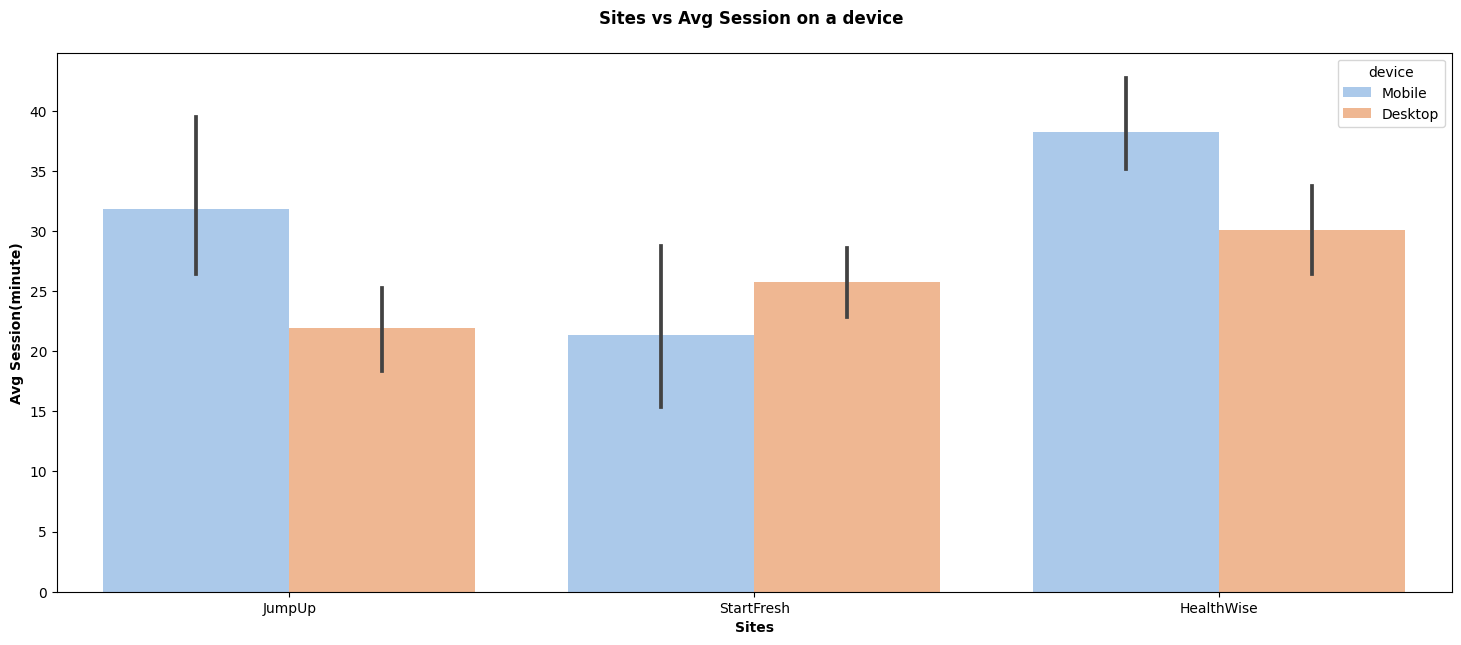

In [167]:
fig, ax = plt.subplots(figsize=(18, 7))
palette_color = sns.color_palette("pastel")
sns.barplot(data=data, x=data["site"], y=data["average_session_time_minutes"], hue = 'device',palette=palette_color)
plt.title("Sites vs Avg Session on a device \n", fontweight="bold")
plt.ylabel("Avg Session(minute)", fontweight="bold")
plt.xlabel("Sites", fontweight="bold")
plt.show()


Based on the analysis and the bar chart, it can be observed that the users of **JumpUp** and **HealthWise** sites primarily use mobile devices for their sessions, while the users of **StartFresh** site tend to prefer desktop devices. This suggests that the choice of device varies across different sites, with mobile devices being more popular for certain sites and desktop devices being preferred for others.

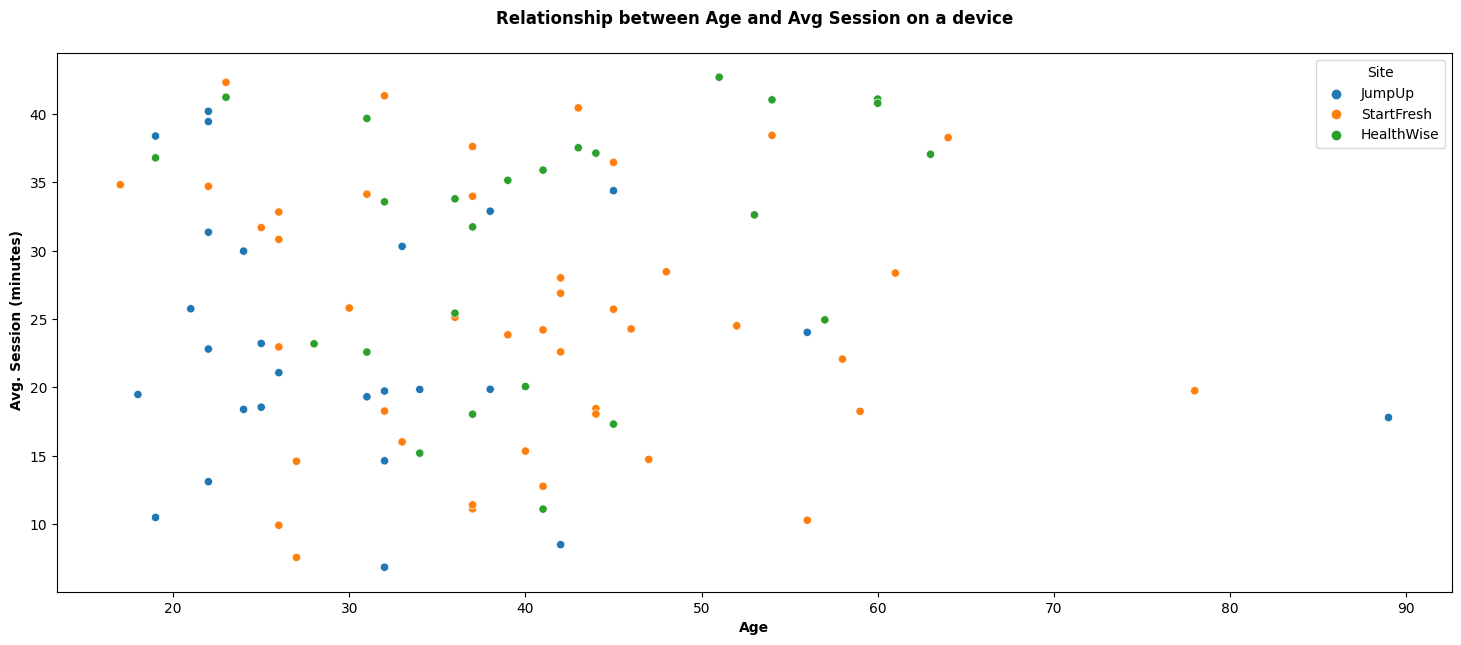

In [168]:
plt.figure(figsize=(18, 7))
sns.scatterplot(
    x=data.age, y=data.average_session_time_minutes, hue=data.site
)
plt.title("Relationship between Age and Avg Session on a device\n", fontweight="bold")
plt.xlabel("Age", fontweight="bold")
plt.ylabel(" Avg. Session (minutes)", fontweight="bold")
plt.legend(title='Site')
plt.show()

It can be observed from the scatter plot analysis,  that there is no evident relationship between the age of users and the average session time on a device across all sites. However, further investigation by examining each site individually may provide insights into potential site-specific trends.

<Figure size 1800x700 with 0 Axes>

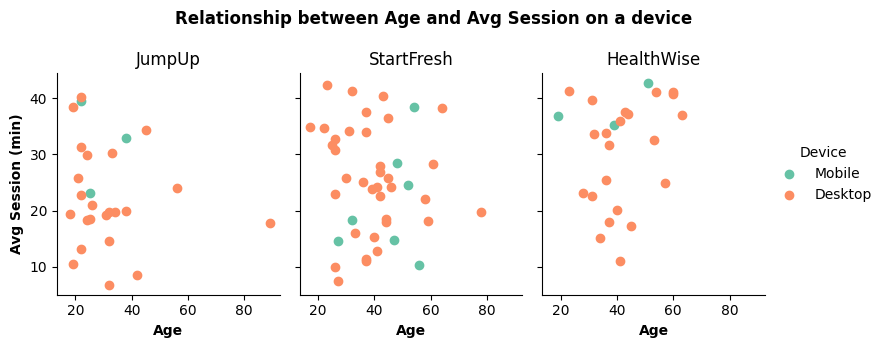

In [169]:
plt.figure(figsize=(18, 7))
graphs = sns.FacetGrid(data, col="site", height=3.5, aspect=0.75, hue="device",palette="Set2")
graphs.map(plt.scatter, "age", "average_session_time_minutes")
sites = data["site"].unique()
for i, site in enumerate(sites):
    graphs.axes[0,i].set_title(site)
graphs.fig.subplots_adjust(top=0.8)
graphs.fig.suptitle("Relationship between Age and Avg Session on a device", fontweight="bold")
graphs.set_axis_labels("Age", "Avg Session (min)",fontweight="bold")
graphs.add_legend(title = 'Device')
plt.show()

    

The scatter plots reveal a preference for desktop usage, particularly among younger age groups. The relationship between age and average session duration on a device varies across the sites, suggesting a slightly inverse relationship where younger users tend to spend more time on devices, especially when using desktops.

<Figure size 1800x700 with 0 Axes>

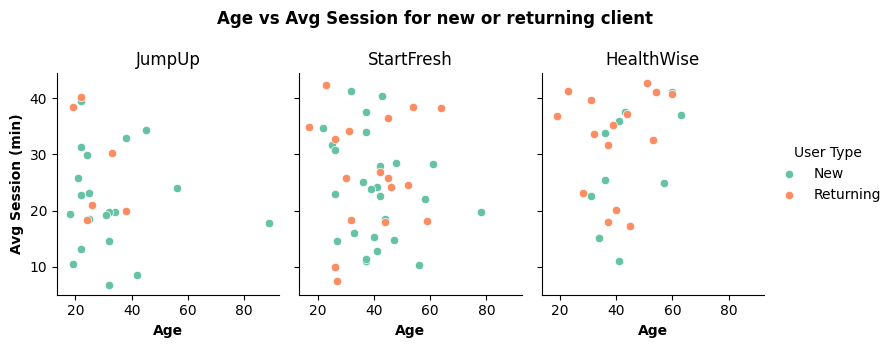

In [170]:
plt.figure(figsize=(18, 7))
graphs = sns.FacetGrid(data, col="site", height=3.5, aspect=0.75, col_wrap=3,hue="new_or_returning", palette="Set2")
graphs.map(sns.scatterplot, "age", "average_session_time_minutes")
sites = data["site"].unique()
for i, site in enumerate(sites):
    graphs.axes[i].set_title(site)
graphs.fig.subplots_adjust(top=0.8)
graphs.fig.suptitle("Age vs Avg Session for new or returning client ", fontweight="bold")
graphs.set_axis_labels("Age", "Avg Session (min)",fontweight="bold")
graphs.add_legend(title="User Type")
plt.show()


 it appears that the relationship between age and average session duration is less consistent for returning users compared to new users. Additionally, there is an inverse relationship between age and average session duration for new users, indicating that younger users tend to have longer average session durations.

<Figure size 1800x700 with 0 Axes>

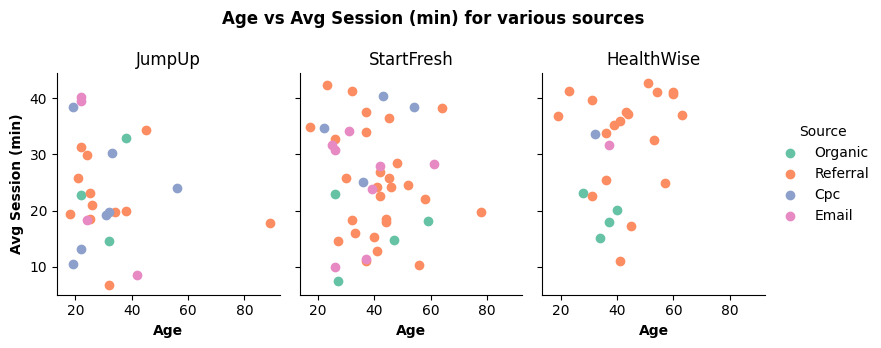

In [171]:

plt.figure(figsize=(18, 7))
graphs = sns.FacetGrid(data, col="site", height=3.5, aspect=0.75, hue="source", palette="Set2")
graphs.map(plt.scatter, "age", "average_session_time_minutes")
sites = data["site"].unique()
for i, site in enumerate(sites):
    graphs.axes[0, i].set_title(site)
graphs.fig.subplots_adjust(top=0.8)
graphs.fig.suptitle("Age vs Avg Session (min) for various sources", fontweight="bold")
graphs.set_axis_labels("Age", "Avg Session (min)",fontweight="bold")
graphs.add_legend(title='Source')
plt.show()

Most users are sourced from referrals with healthwise users showing a proportional relationship as opposed to the other sites.

# User interactions for the month
By examining user interactions we can gain valuable insights into user behavior and preferences. This analysis aims to provide a comprehensive understanding of user interactions with the devices for a month.

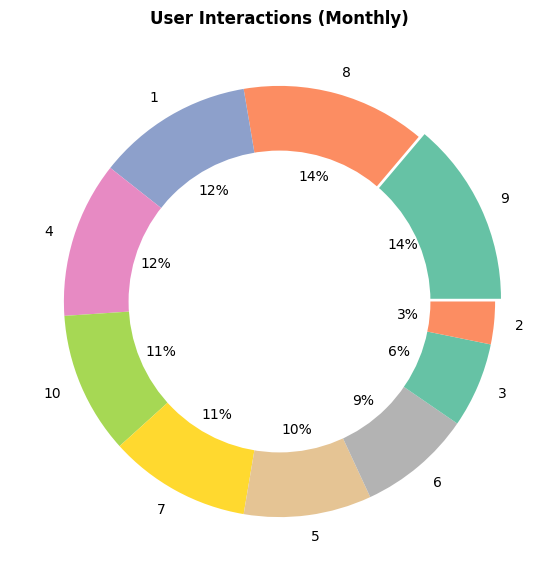

In [175]:
plt.figure(figsize=(15,7))
interactions_counts = data['interactions_this_month'].value_counts()
unique_interactions = interactions_counts.index
unique_interactions = data.interactions_this_month.unique()
explode = [0.03 if interactions == unique_interactions[0] else 0 for interactions in unique_interactions]
palette_color = sns.color_palette("Set2")
plt.pie(data['interactions_this_month'].value_counts().sort_values(ascending=False), 
        labels=data['interactions_this_month'].unique(),
        colors=palette_color,
        explode=explode,
        autopct="%.0f%%",
)
center_circle = plt.Circle((0,0),0.70, fc = 'white')
fig=plt.gcf()
fig.gca().add_artist(center_circle)
plt.title("User Interactions (Monthly)", fontweight="bold")
plt.show()

The highest count of user interactions is 9, accounting for 14% of the total interactions. However, upon closer inspection, it appears that the proportions of interactions are evenly distributed above 4 counts, with the count of 9 being the highest among them. This suggests that a significant number of users engage in multiple interactions, and there is a relatively balanced distribution across these higher counts.

In [176]:
site_avg_interactions=data.groupby(["site"])[["interactions_this_month","average_session_time_minutes"]].mean().sort_values(by ="interactions_this_month",ascending=False).round(2)
site_avg_interactions

,interactions_this_month,average_session_time_minutes
site,,
StartFresh,7.14,25.05
HealthWise,5.44,31.02
JumpUp,5.31,23.09


These values provide an overview of the average user interactions and session duration for each site. HealthWise has the highest average number of interactions per month, followed by StartFresh and JumpUp. However, when considering the average session time, HealthWise also has the longest average session duration, while StartFresh and JumpUp have slightly lower average session times.

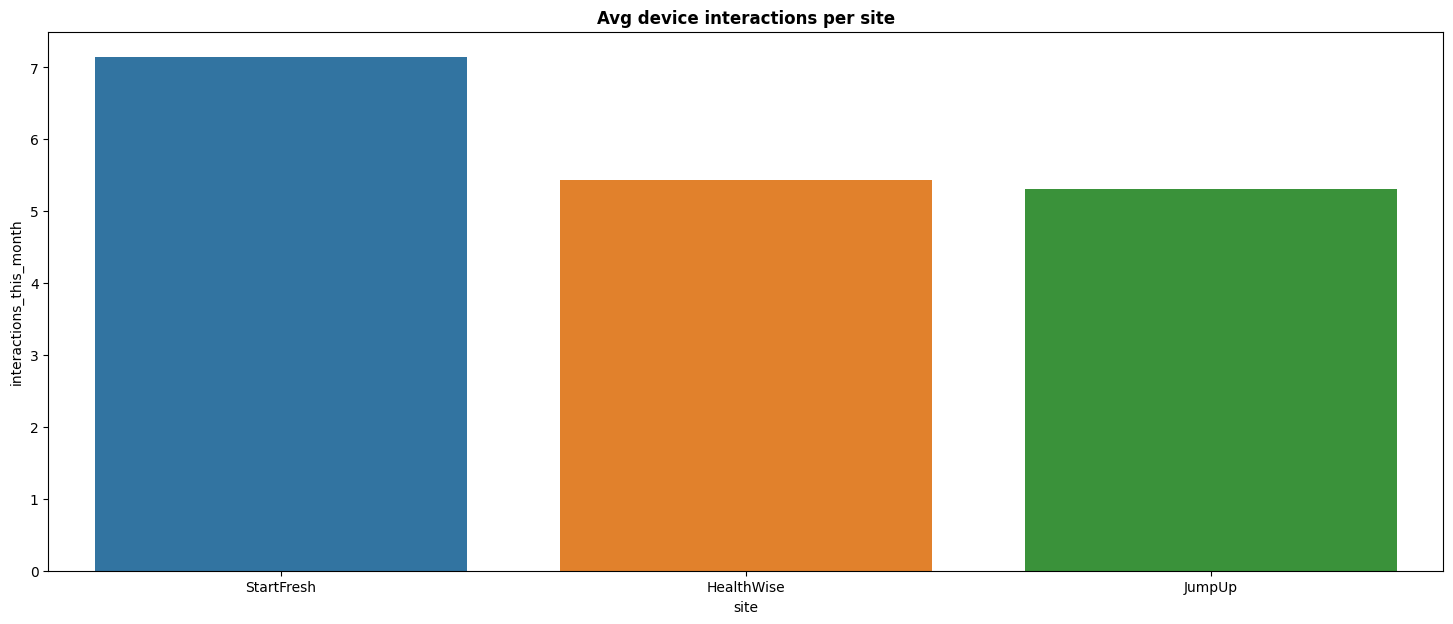

In [177]:
plt.figure(figsize=(18, 7))
palette_color = sns.color_palette("bright")
sns.barplot(y=site_avg_interactions["interactions_this_month"], x=site_avg_interactions.index
 )
plt.title("Avg device interactions per site", fontweight="bold")
plt.show()

The plot visualizes the average number of interactions per month for each site. **StartFresh** has the highest average interactions, followed by **HealthWise**. This indicates that users on **StartFresh** are more engaged and have a higher number of interactions on average compared to users on **HealthWise** and **JumpUp**. 

<Figure size 1800x700 with 0 Axes>

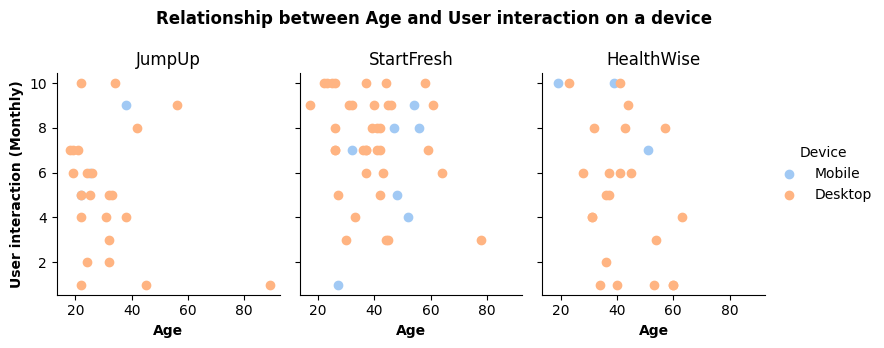

In [180]:
plt.figure(figsize=(18, 7))
graphs = sns.FacetGrid(data, col="site", height=3.5, aspect=0.75, hue="device",palette="pastel")
graphs.map(plt.scatter, "age", "interactions_this_month")
sites = data["site"].unique()
for i, site in enumerate(sites):
    graphs.axes[0,i].set_title(site)
graphs.fig.subplots_adjust(top=0.8)
graphs.fig.suptitle("Relationship between Age and User interaction on a device", fontweight="bold")
graphs.set_axis_labels("Age", "User interaction (Monthly)",fontweight="bold")
graphs.add_legend(title = 'Device')
plt.show()

The scatter plots illustrate a slightly inverse relationship between user interactions with their devices and age, specifically for desktop users. As age increases, the number of interactions per month tends to decrease. This suggests that younger users are more active and engaged with their devices compared to older users.

<Figure size 1800x700 with 0 Axes>

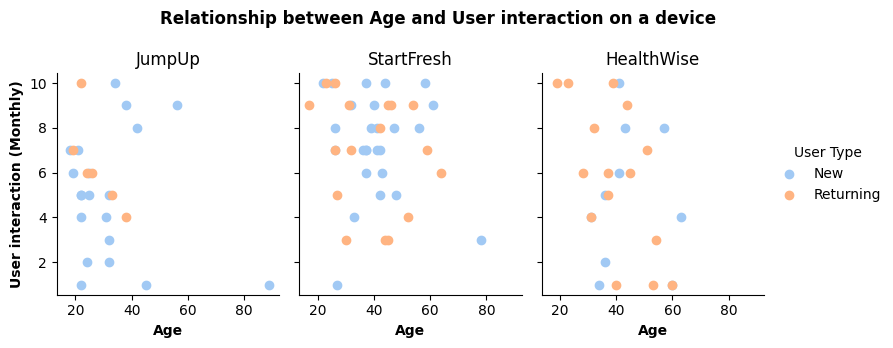

In [179]:
plt.figure(figsize=(18, 7))
graphs = sns.FacetGrid(data, col="site", height=3.5, aspect=0.75, hue="new_or_returning",palette="pastel")
graphs.map(plt.scatter, "age", "interactions_this_month")
sites = data["site"].unique()
for i, site in enumerate(sites):
    graphs.axes[0,i].set_title(site)
graphs.fig.subplots_adjust(top=0.8)
graphs.fig.suptitle("Relationship between Age and User interaction on a device", fontweight="bold")
graphs.set_axis_labels("Age", "User interaction (Monthly)",fontweight="bold")
graphs.add_legend(title = 'User Type')
plt.show()

The analysis suggests that new users tend to have higher levels of device interaction compared to returning users. Additionally, there appears to be a slight inverse relationship between user interaction and age, indicating that younger users tend to have higher levels of device interaction.

<Figure size 1800x700 with 0 Axes>

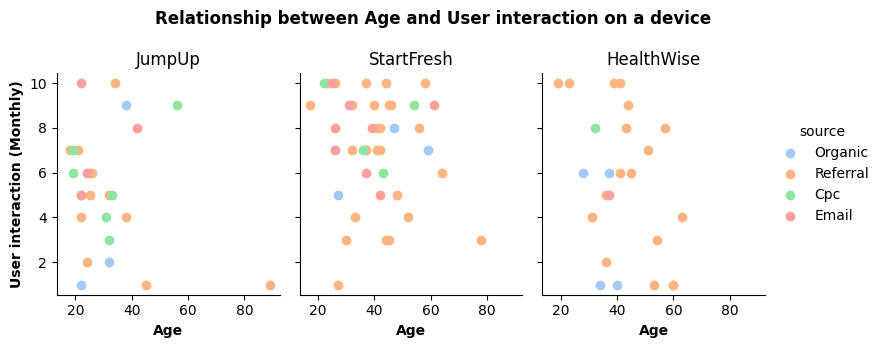

In [178]:
plt.figure(figsize=(18, 7))
graphs = sns.FacetGrid(data, col="site", height=3.5, aspect=0.75, hue="source",palette="pastel")
graphs.map(plt.scatter, "age", "interactions_this_month")
sites = data["site"].unique()
for i, site in enumerate(sites):
    graphs.axes[0,i].set_title(site)
graphs.fig.subplots_adjust(top=0.8)
graphs.fig.suptitle("Relationship between Age and User interaction on a device", fontweight="bold")
graphs.set_axis_labels("Age", "User interaction (Monthly)",fontweight="bold")
graphs.add_legend(title = 'source')
plt.show()


The analysis reveals that users sourced from referrals show significant levels of device interaction. Additionally, there is an inverse relationship between user interaction and the age of the users, suggesting that younger users tend to have higher levels of interaction on the devices.

# Conclusions

The analysis of user activity on technological devices across three programs has provided valuable insights into user behavior. These findings can inform marketing strategies, user engagement initiatives, and platform optimization efforts. Understanding user age distribution, device preferences, and session durations allows for targeted improvements in user experiences. Additionally, identifying popular sites, user sources, and the impact of client acquisition strategies can guide resource allocation and future decision-making. By considering these insights, the platform can better cater to the needs and preferences of its users, ultimately enhancing user satisfaction and engagement.